We are going to create a neural network with 2 inputs, 3 hidden neurons and 2 output neurons. 


In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [40]:
def eval_accuracy_neural(params, data, labels):
    A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5 = params
    num_correct = 0;
 
    for (X, Y), label_old in zip(data, labels):
        score = circuit_forward(A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5, X, Y)
        sc = np.array((int(score[0] > 0.5), int(score[1] > 0.5)))
        true_label = convert_label(label_old)
        if (sc[0] == true_label[0] and sc[1] == true_label[1]):
            num_correct += 1
    return num_correct / len(data)


def plot_neural_simple(params, grid,data, labels, iteration, accuracy):
    nudge = 0.06
    A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5 = params
    xx, yy, Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j], yy[i][j]
            score = circuit_forward(A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5, X, Y) 
            score = -1 if np.argmax(score) == 0 else 1
            Z[i][j] = score
        
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap=plt.cm.bwr, zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}', (d[0]+nudge, d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
    
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx, yy, np.ones(xx.shape))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def circuit_forward(A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5, X, Y):
    N1 = sigmoid(A1*X + B1*Y + C1)      # 1st neuron
    N2 = sigmoid(A2*X + B2*Y + C2)      # 2nd neuron
    N3 = sigmoid(A3*X + B3*Y + C3)      # 3rd neuron
    O1 = A4*N1 + B4*N2 + C4*N3 + D4     # output 1
    O2 = A5*N1 + B5*N2 + C5*N3 + D5     # output 2
    return O1, O2

def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}', (d[0] + nudge, d[1] + nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()
    
def convert_label(label):
    if (label == -1):
        return (1,0)
    if (label == 1):
        return (0,1)    

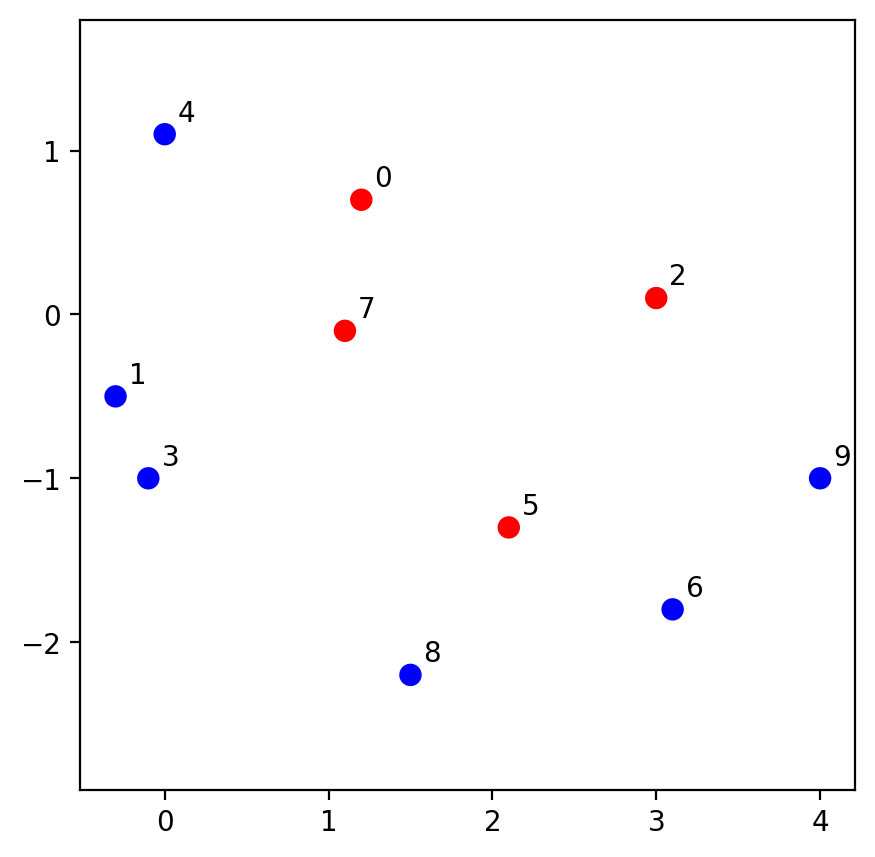

In [41]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])
labels = np.array([  1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])
plot_data(data, labels)

In [62]:
def train_neural_network(data, labels, step_size, epochs, iter_info):

    # first we initialise all the weights and biases as normally distributed random numbers:
    rnd = np.random.normal(size=17)
    # hidden layer neuron 1
    A1 = rnd[0] #weight for X
    B1 = rnd[1] #weight for Y
    C1 = rnd[2] #bias

    # hidden layer neuron 2
    A2 = rnd[3] #weight for X
    B2 = rnd[4] #weight for Y
    C2 = rnd[5] #bias
    
    # hidden layer neuron 3
    A3 = rnd[6] #weight for X
    B3 = rnd[7] #weight for Y
    C3 = rnd[8] #bias

    # output layer neuron 1
    A4 = rnd[9] # weight for n1
    B4 = rnd[10] # weight for n2
    C4 = rnd[11] # weight for n3
    D4 = rnd[12] # bias
    
    # output layer neuron 2
    A5 = rnd[13] # weight for n1
    B5 = rnd[14] # weight for n2
    C5 = rnd[15] # weight for n3
    D5 = rnd[16] # bias
    
    grid = create_meshgrid(data)

    # in each epoch, we will go through all the data points once
    for i in range(epochs):
        # total cost must be restarted in every epoch
        total_cost = 0.0
        ddA1, ddA2, ddA3, ddA4, ddA5, ddB1, ddB2, ddB3, ddB4, ddB5, ddC1, ddC2, ddC3, ddC4, ddC5, ddD4, ddD5 = np.zeros(17)
        # here we loop trough all the data points, and get X, Y and the corresponding label
        for index, ((X,Y), label_old) in enumerate(zip(data, labels)): 
            # forward pass
            N1 = sigmoid(A1*X + B1*Y + C1)      # 1st neuron
            N2 = sigmoid(A2*X + B2*Y + C2)      # 2nd neuron
            N3 = sigmoid(A3*X + B3*Y + C3)      # 3rd neuron
            O1 = sigmoid(A4*N1 + B4*N2 + C4*N3 + D4)     # output 1
            O2 = sigmoid(A5*N1 + B5*N2 + C5*N3 + D5)     # output 2
            
            # convert the old labels -1 and 1 to tuples (1,0) and (0,1)
            label = convert_label(label_old)
            
            # This is the implementation of the quadratic cost for the single data point
            cost1 = (label[0] - O1)**2
            cost2 = (label[1] - O2)**2
            cost12 = cost1 + cost2
            # This value is then accumulated into total_cost variable, so that the cost is expressed
            # for all the data points
            total_cost += cost12
            
        ###########
            
            
            # My derivatives:
            
            # dtotal_cost/dcost1
            dC1, dC2 = 1, 1
            
            # dtotal_cost/dO1
            dO1 = 1*2*(O1 - label[0])
            dO2 = 1*2*(O2 - label[1])
            
            # reduced notation:
            dz1 = dO1*O1*(1 - O1)
            dz2 = dO2*O2*(1 - O2)
            
            # dtotal_cost/dA4
            dA4 = dz1*N1
            dA5 = dz2*N1
            dB4 = dz1*N2
            dB5 = dz2*N2
            dC4 = dz1*N3
            dC5 = dz2*N3
            dD4 = dz1*1
            dD5 = dz2*1
            
            # reduced notation:
            dp1 = 1*2*(O1 - label[0])*O1*(1 - O1)
            dp2 = 1*2*(O2 - label[1])*O2*(1 - O2)
            
            # dtotal_cost/dA1
            dA1 = dp1*A4*N1*(1 - N1)*X + dp2*A5*N1*(1 - N1)*X
            dA2 = dp1*B4*N2*(1 - N2)*X + dp2*B5*N2*(1 - N2)*X
            dA3 = dp1*C4*N3*(1 - N3)*X + dp2*C5*N3*(1 - N3)*X
            
            dB1 = dp1*A4*N1*(1 - N1)*Y + dp2*A5*N1*(1 - N1)*Y
            dB2 = dp1*B4*N2*(1 - N2)*Y + dp2*B5*N2*(1 - N2)*Y
            dB3 = dp1*C4*N3*(1 - N3)*Y + dp2*C5*N3*(1 - N3)*Y
            
            dC1 = dp1*A4*N1*(1 - N1)*1 + dp2*A5*N1*(1 - N1)*1
            dC2 = dp1*B4*N2*(1 - N2)*1 + dp2*B5*N2*(1 - N2)*1
            dC3 = dp1*C4*N3*(1 - N3)*1 + dp2*C5*N3*(1 - N3)*1
            
            # dtotal_cost/dN1
            dN1 = dp1*A4 + dp2*A5
            dN2 = dp1*B4 + dp2*B5
            dN3 = dp1*C4 + dp2*C5
            
            
        ###########
    
            # since we have multiple data points, and we can compute only a single partial derivative at the time
            # we accumulate their values in the variables ddA1...ddC3
            
            ddA1 += dA1
            ddA2 += dA2
            ddA3 += dA3
            ddA4 += dA4
            ddA5 += dA5
            ddB1 += dB1
            ddB2 += dB2
            ddB3 += dB3
            ddB4 += dB4
            ddB5 += dB5
            ddC1 += dC1
            ddC2 += dC2
            ddC3 += dC3
            ddC4 += dC4
            ddC5 += dC5
            ddD4 += dD4
            ddD5 += dD5
        
        # Now we make an average of all the accumulated derivatives by dividing with the number of data points
        datalen = len(data)
        ddA1 /= datalen
        ddA2 /= datalen
        ddA3 /= datalen
        ddA4 /= datalen
        ddA5 /= datalen
        ddB1 /= datalen
        ddB2 /= datalen
        ddB3 /= datalen
        ddB4 /= datalen
        ddB5 /= datalen
        ddC1 /= datalen
        ddC2 /= datalen
        ddC3 /= datalen
        ddC4 /= datalen
        ddC5 /= datalen
        ddD4 /= datalen
        ddD5 /= datalen

        # finally, we do the parameter update with the averaged values ddA1...ddC3
        A1 -= step_size * ddA1; 
        B1 -= step_size * ddB1; 
        C1 -= step_size * ddC1;
        A2 -= step_size * ddA2; 
        B2 -= step_size * ddB2;
        C2 -= step_size * ddC2;
        A3 -= step_size * ddA3; 
        B3 -= step_size * ddB3; 
        C3 -= step_size * ddC3;
        A4 -= step_size * ddA4; 
        B4 -= step_size * ddB4; 
        C4 -= step_size * ddC4;
        A5 -= step_size * ddA5; 
        B5 -= step_size * ddB5; 
        C5 -= step_size * ddC5;
        D4 -= step_size * ddD4;
        D5 -= step_size * ddD5;

        if (i%iter_info == 0):
            accuracy = eval_accuracy_neural((A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5), data,labels)
            plot_neural_simple((A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5), grid, data, labels, i, accuracy)
            print (f'total cost: {round(total_cost,4)}\n')
        
    return (A1, A2, A3, A4, A5, B1, B2, B3, B4, B5, C1, C2, C3, C4, C5, D4, D5)

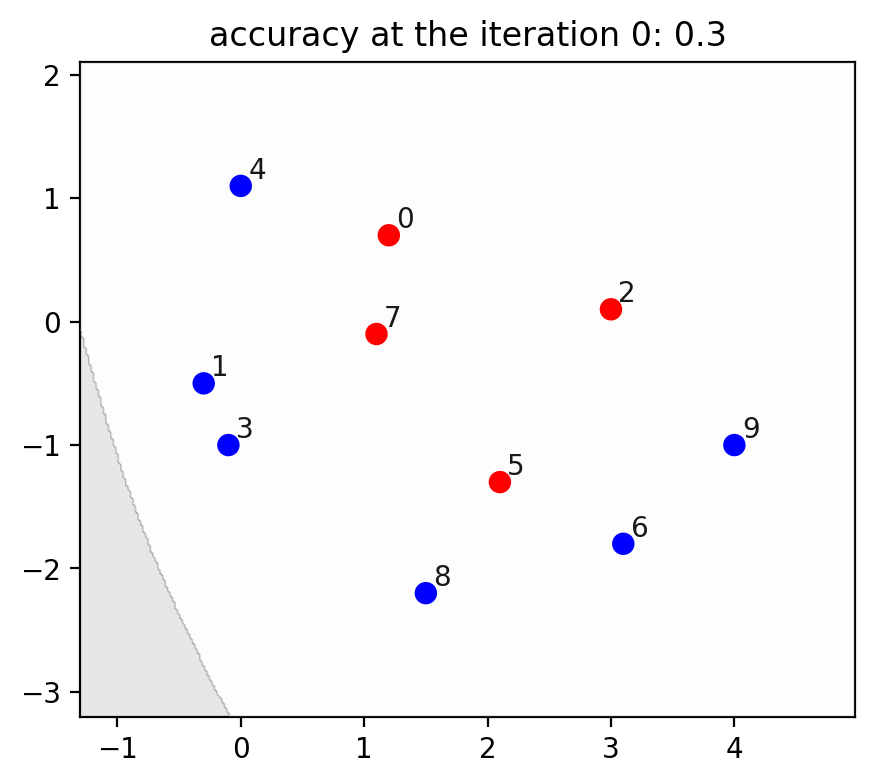

total cost: 5.1481



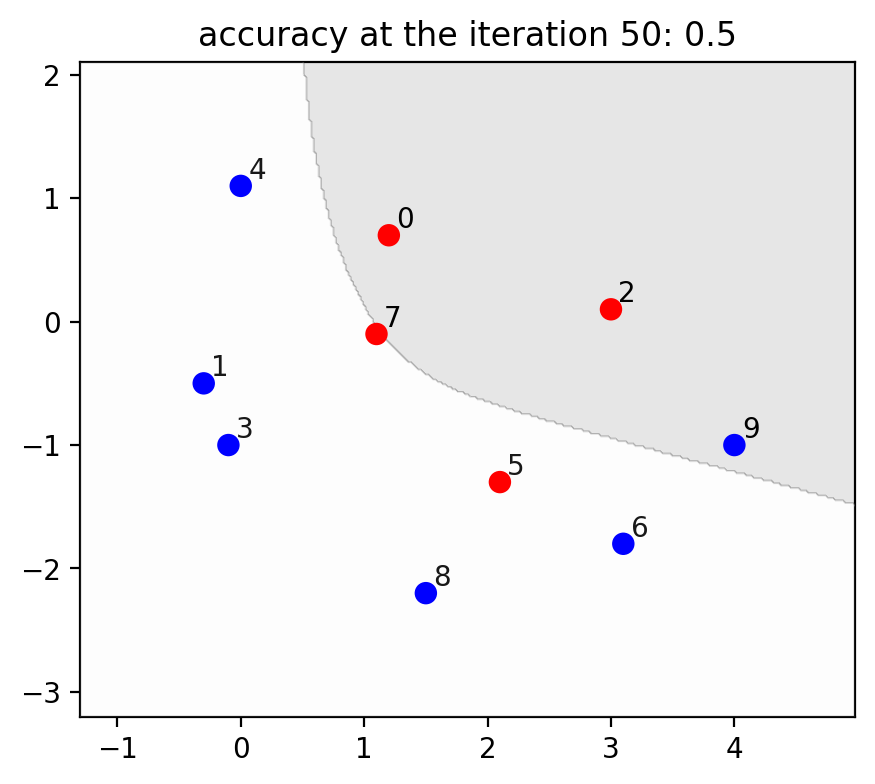

total cost: 3.3393



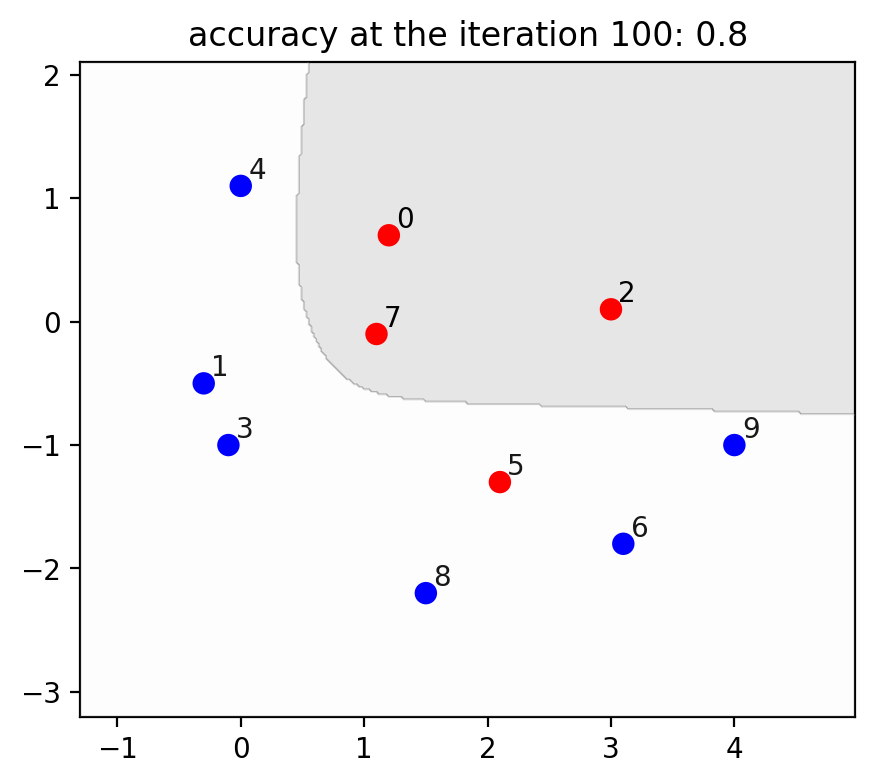

total cost: 2.2135



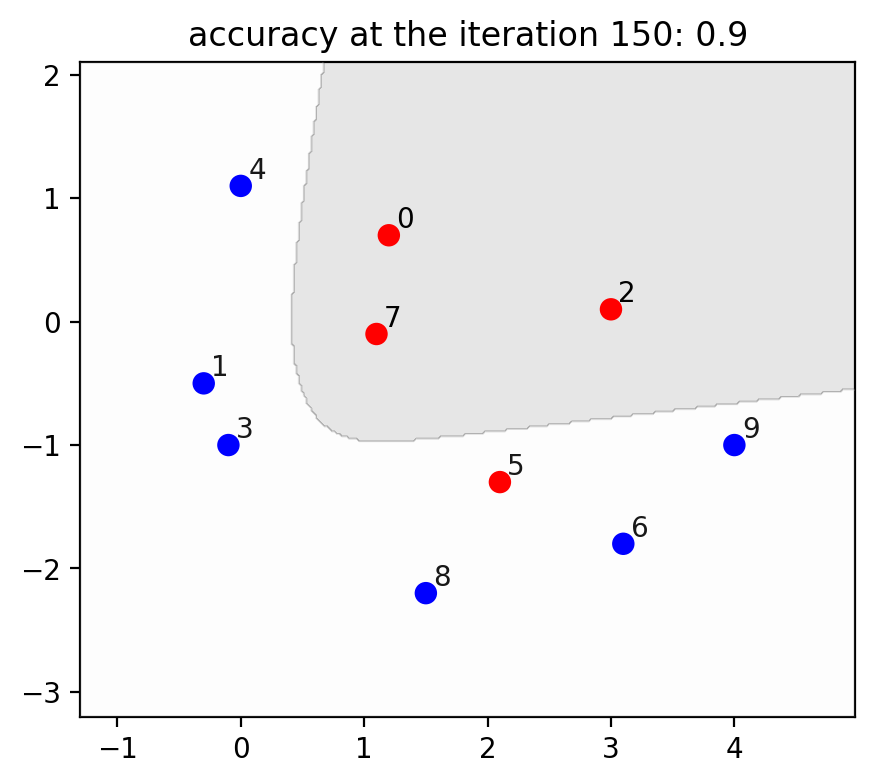

total cost: 1.6919



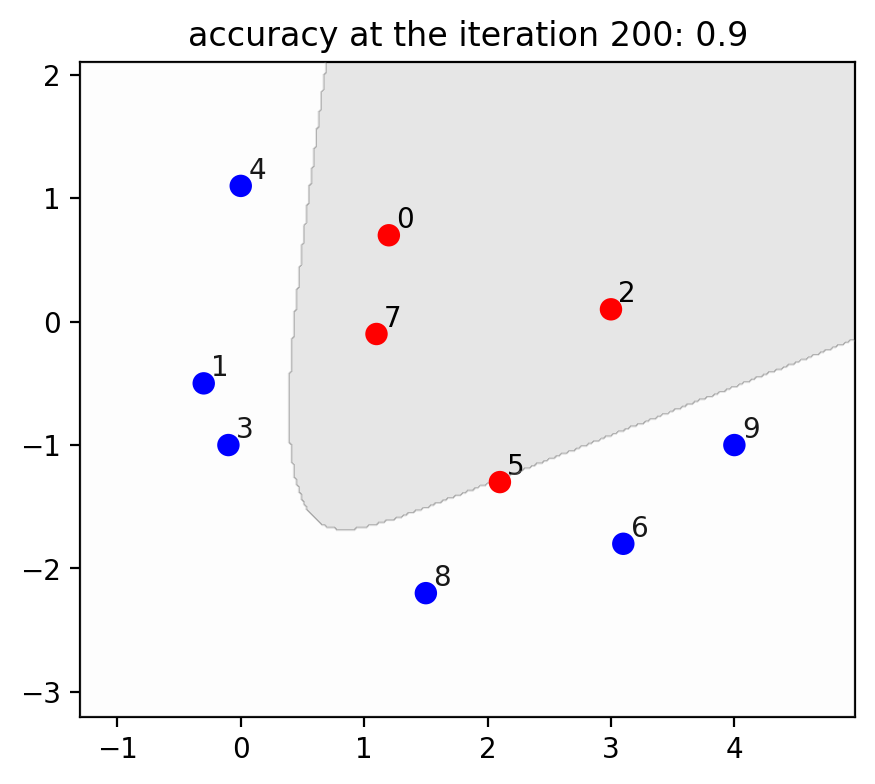

total cost: 1.1743



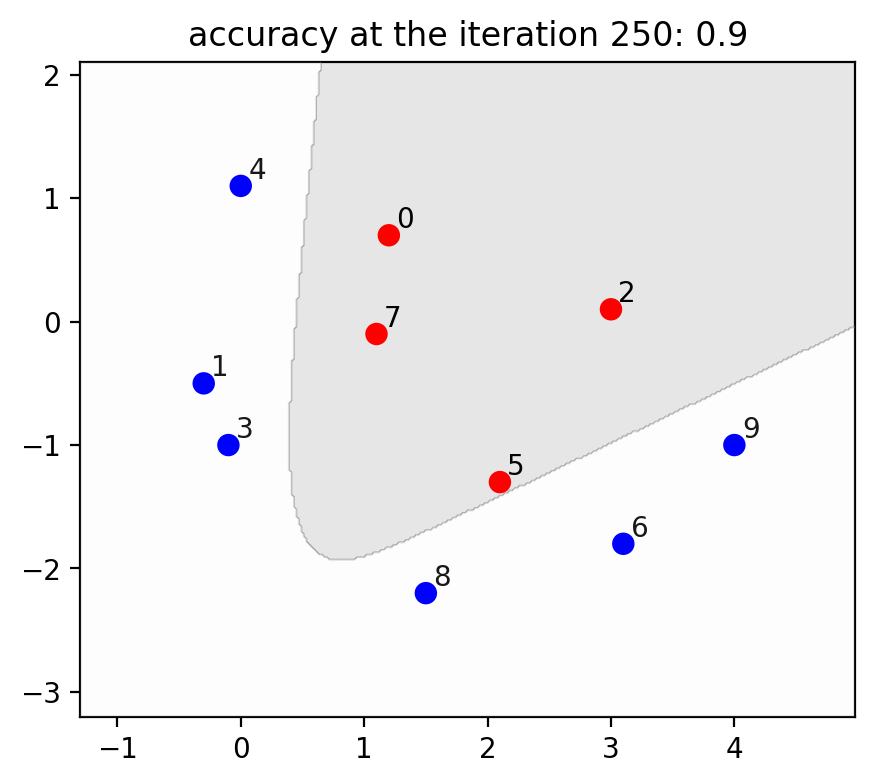

total cost: 0.8051



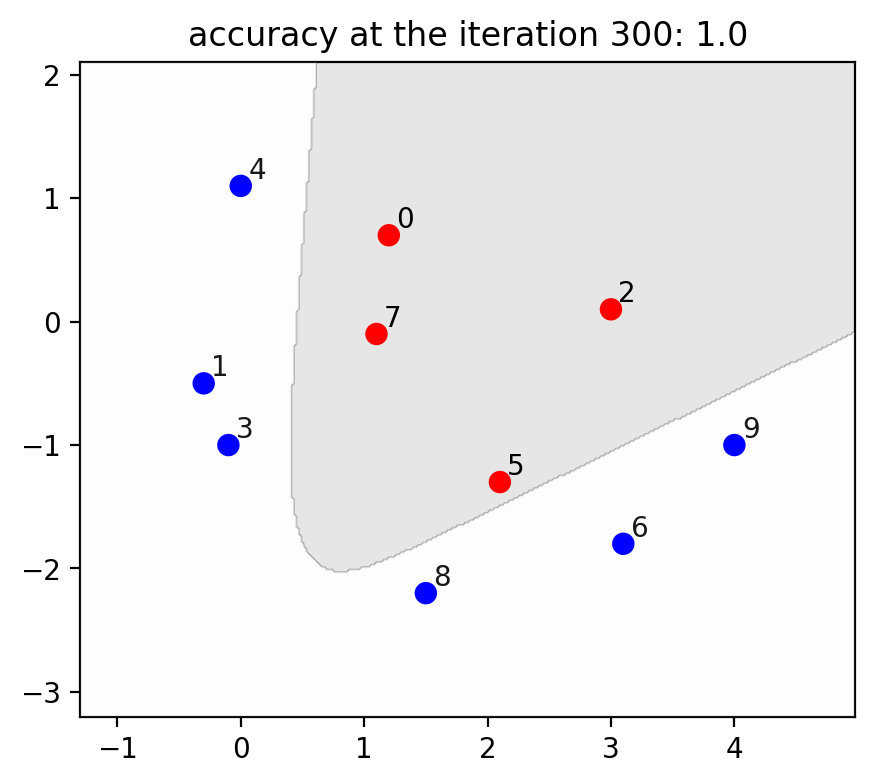

total cost: 0.5743



In [63]:
train = train_neural_network(data, labels, 2, 301, 50)

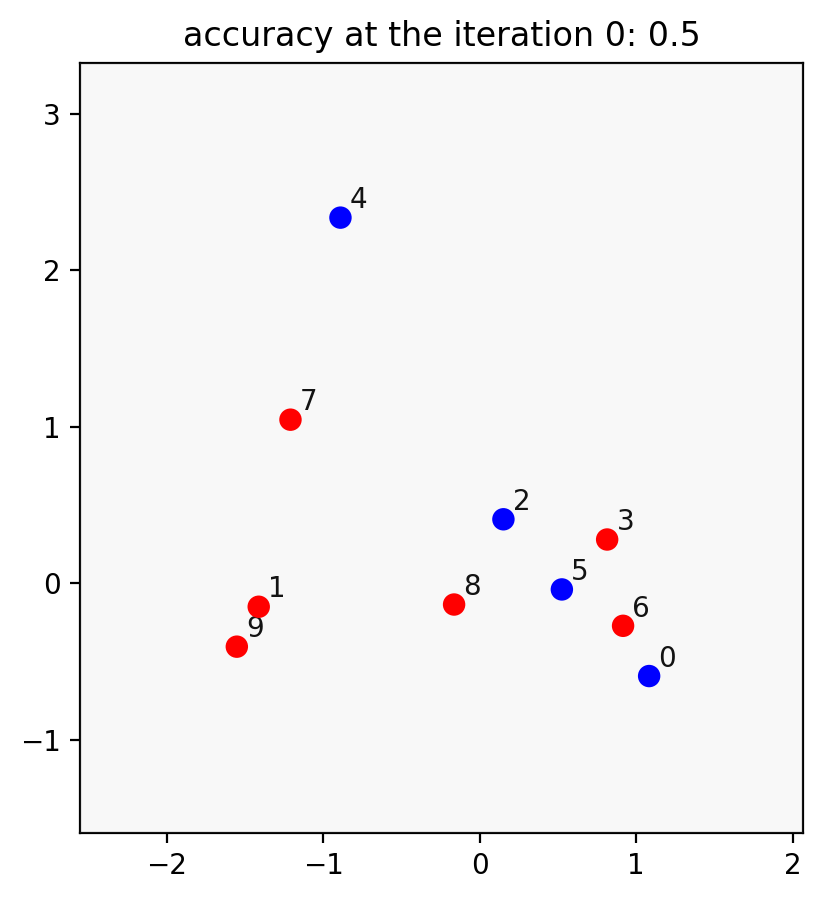

total cost: 7.2978



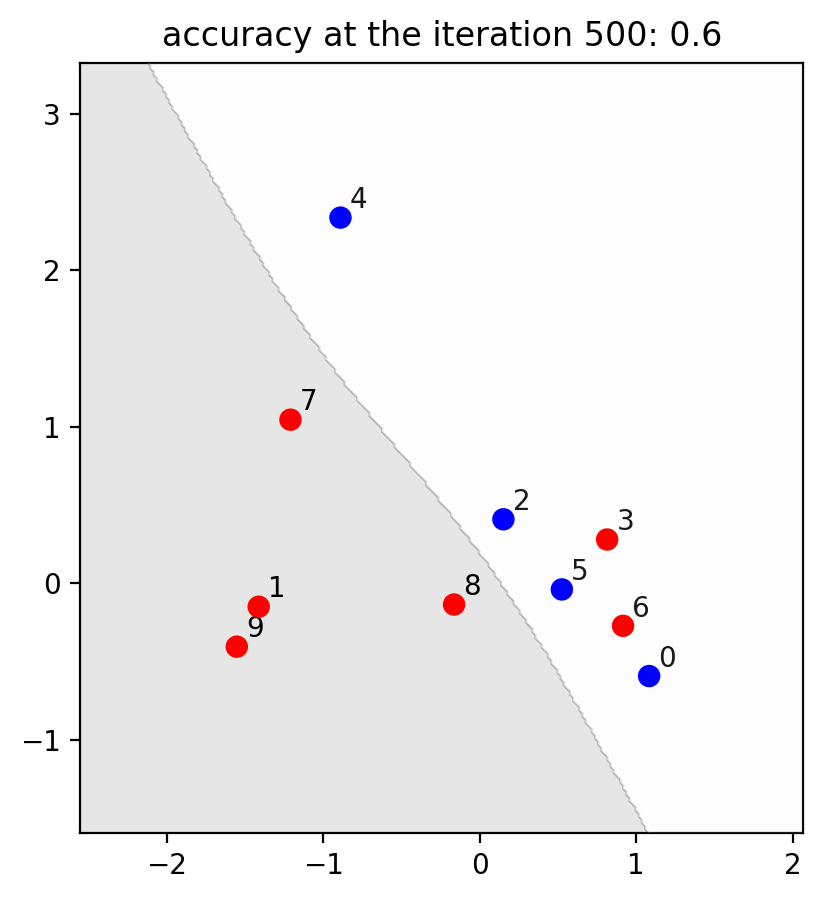

total cost: 2.442



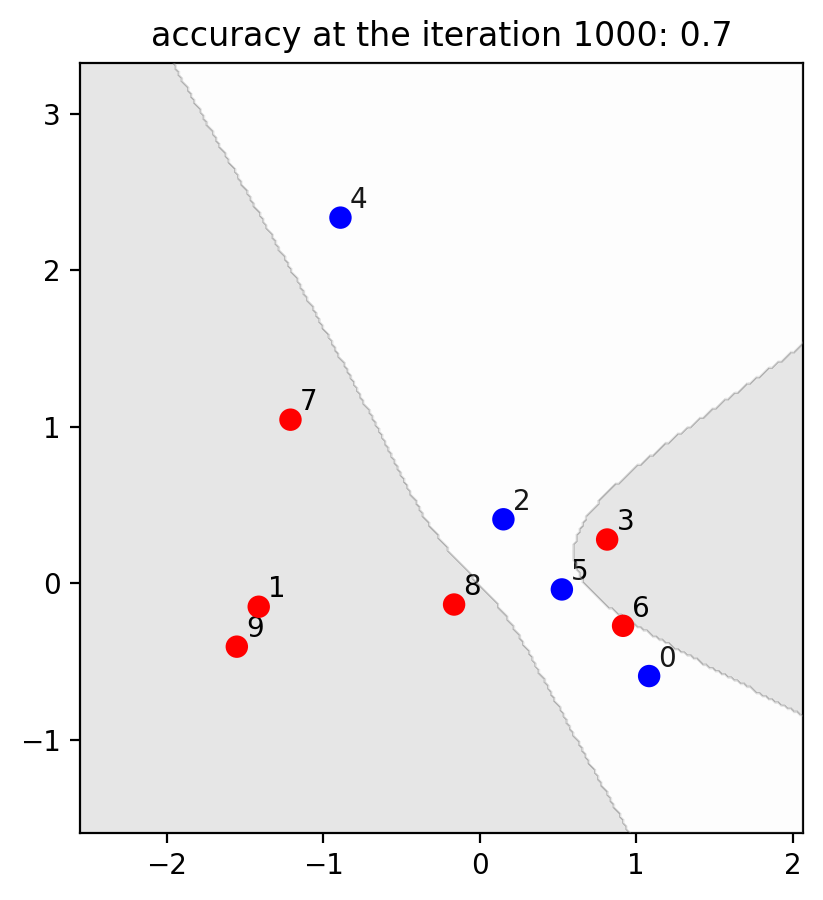

total cost: 1.7525



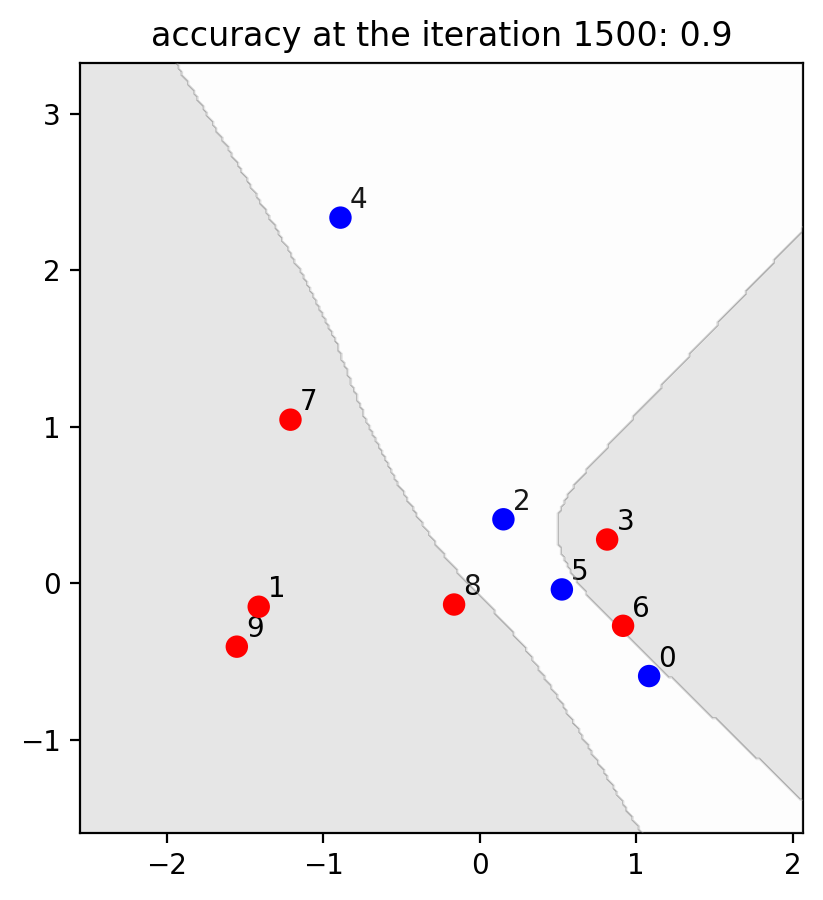

total cost: 0.8667



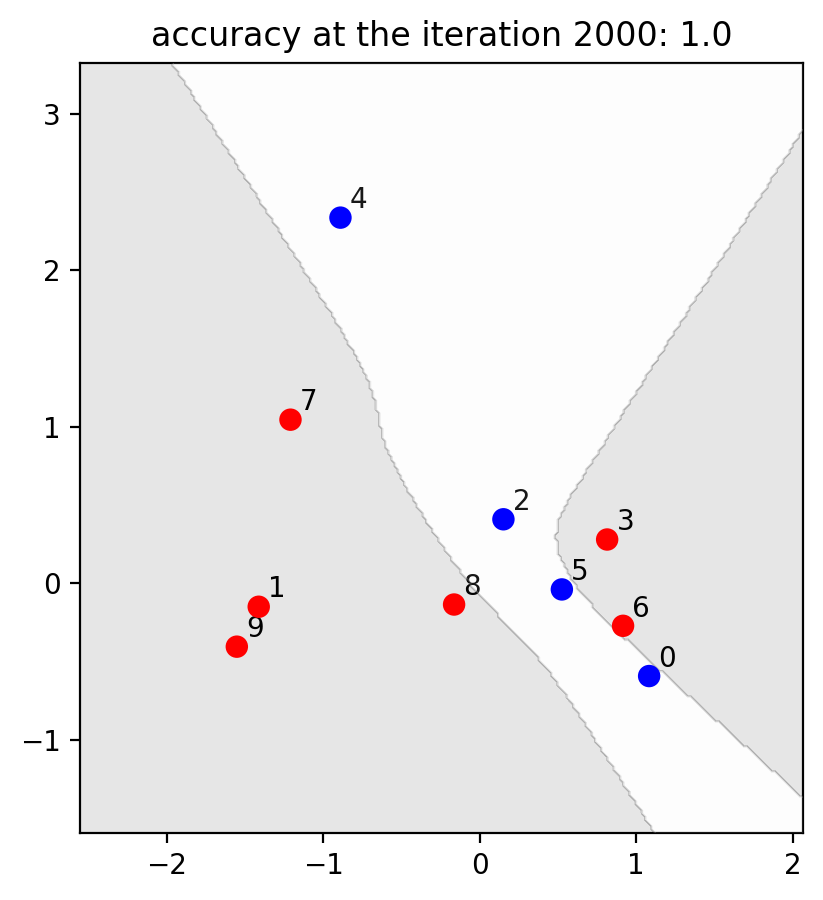

total cost: 0.4389



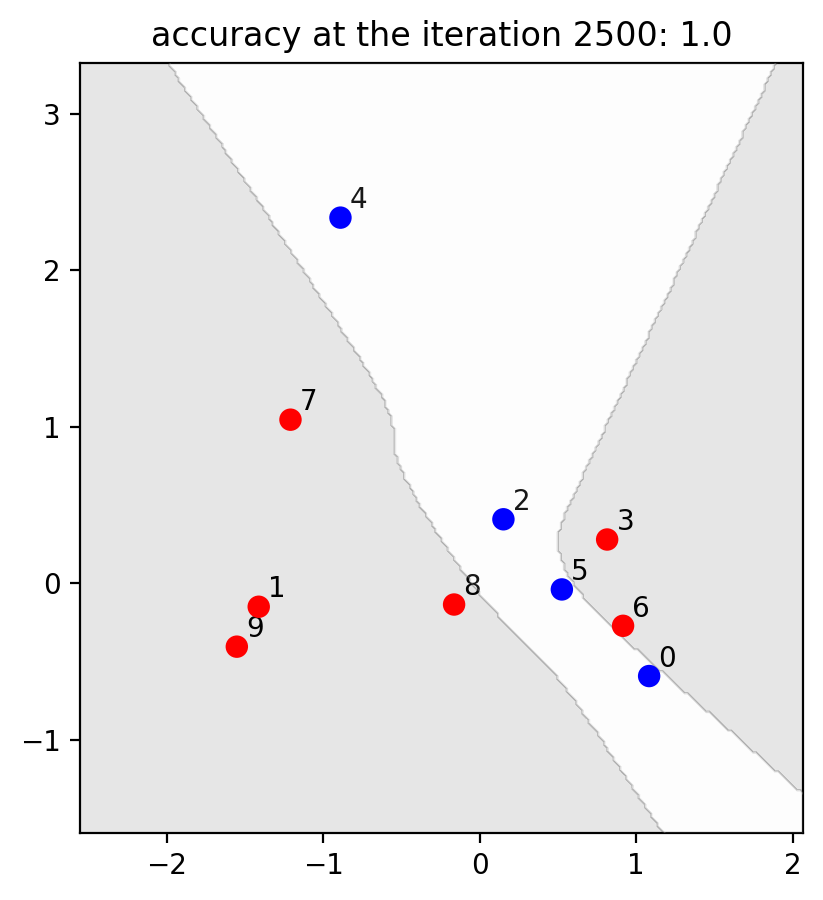

total cost: 0.2485



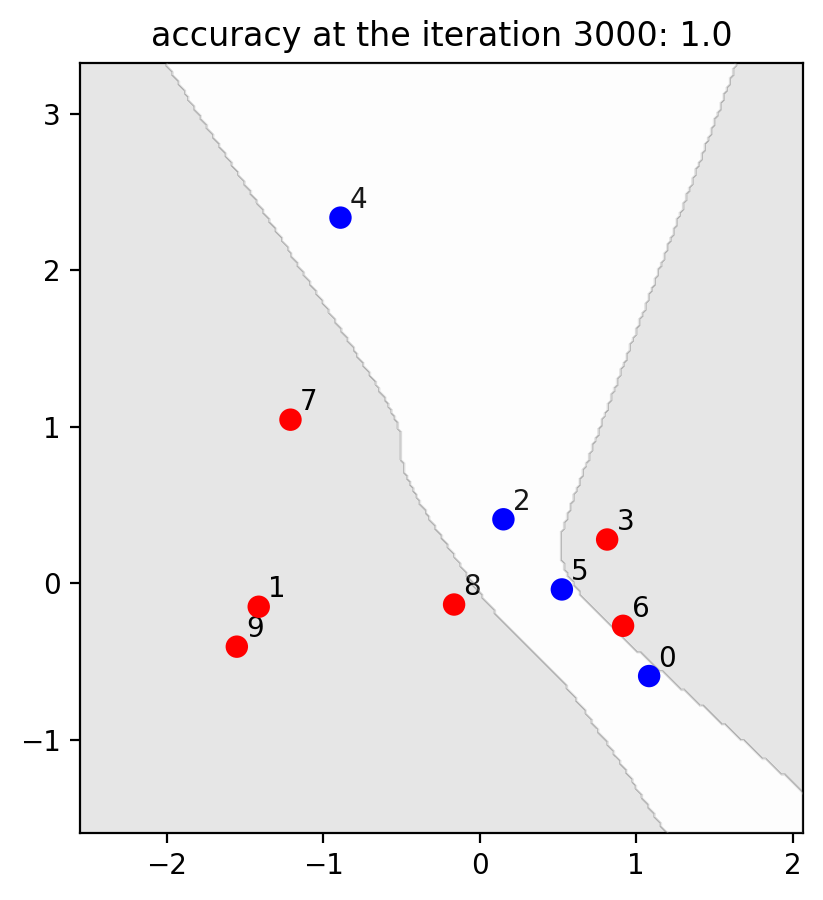

total cost: 0.1606



(-6.373663508728379,
 10.792333345311604,
 -10.964766495899365,
 5.869597019967882,
 -5.759576292259748,
 2.3887880608020935,
 7.122572992231422,
 -12.939547887537985,
 12.286458818308496,
 -12.072685095265431,
 2.9486478797083118,
 -0.5241204550481243,
 5.4643305095426555,
 6.890089744901973,
 -6.744459766911529,
 -15.85215196487504,
 15.56072192813596)

In [65]:
# Random data points (X, Y):
num_points = 10
rdata = np.random.randn(num_points, 2)  

# Random relative labels:
rlabels = np.random.choice([-1, 1], num_points)  

train_neural_network(rdata, rlabels, 2, 3001, 500)